# KBO 데이터

In [1]:
import pandas as pd

In [2]:
kbo = pd.read_csv('2019_kbo_for_kaggle_v2.csv')
kbo.head()

,batter_name,age,G,PA,AB,R,H,2B,3B,HR,...,tp,1B,FBP,avg,OBP,SLG,OPS,p_year,YAB,YOPS
0,백용환,24.0,26.0,58.0,52.0,4.0,9.0,4.0,0.0,0.0,...,포수,5.0,6.0,0.173,0.259,0.250,0.509,2014,79.0,0.580
1,백용환,25.0,47.0,86.0,79.0,8.0,14.0,2.0,0.0,4.0,...,포수,8.0,5.0,0.177,0.226,0.354,0.580,2015,154.0,0.784
2,백용환,26.0,65.0,177.0,154.0,22.0,36.0,6.0,0.0,10.0,...,포수,20.0,20.0,0.234,0.316,0.468,0.784,2016,174.0,0.581
3,백용환,27.0,80.0,199.0,174.0,12.0,34.0,7.0,0.0,4.0,...,포수,23.0,20.0,0.195,0.276,0.305,0.581,2017,17.0,0.476
4,백용환,28.0,15.0,20.0,17.0,2.0,3.0,0.0,0.0,0.0,...,포수,3.0,3.0,0.176,0.300,0.176,0.476,2018,47.0,0.691


## 성적과 연봉의 관계

#### 2017년 단일 성적이 2018년 연봉 상승에 얼마나 영향을 미치는지 확인해보자

In [4]:
df_2017 = kbo[kbo['year']==2017][['batter_name','salary','avg','OBP','SLG','war','year_born']]
sal_2018 = kbo[kbo['year']==2018][['batter_name','salary']]
sal_2018.columns = ['batter_name', 'p_salary']

In [5]:
df1 = pd.merge(sal_2018, df_2017, on='batter_name')

In [6]:
df1['yearx'] = pd.to_datetime(df1['year_born'])
df1['year'] = pd.DatetimeIndex(df1['yearx']).year
df1['age'] = 2018 - df1['year']

In [7]:
df1 = df1.drop(['year_born', 'yearx'], axis=1)
df1

,batter_name,p_salary,salary,avg,OBP,SLG,war,year,age
0,백용환,5300,5500,0.176,0.300,0.176,-0.130,1989,29
1,김민식,15000,3000,0.222,0.283,0.293,-0.447,1989,29
2,한승택,7500,3100,0.229,0.289,0.277,-0.140,1994,24
3,황윤호,3100,3000,0.133,0.235,0.267,-0.124,1993,25
4,김선빈,28000,8000,0.370,0.420,0.477,5.047,1989,29
...,...,...,...,...,...,...,...,...,...
141,최원준,7500,3100,0.308,0.351,0.462,0.586,1997,21
142,홍재호,3500,3700,NaN,NaN,NaN,0.001,1987,31
143,김종민,5300,5500,0.136,0.208,0.136,-0.206,1986,32
144,이원석,30000,30000,0.265,0.323,0.450,1.102,1986,32


In [8]:
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='war', ylabel='salary'>

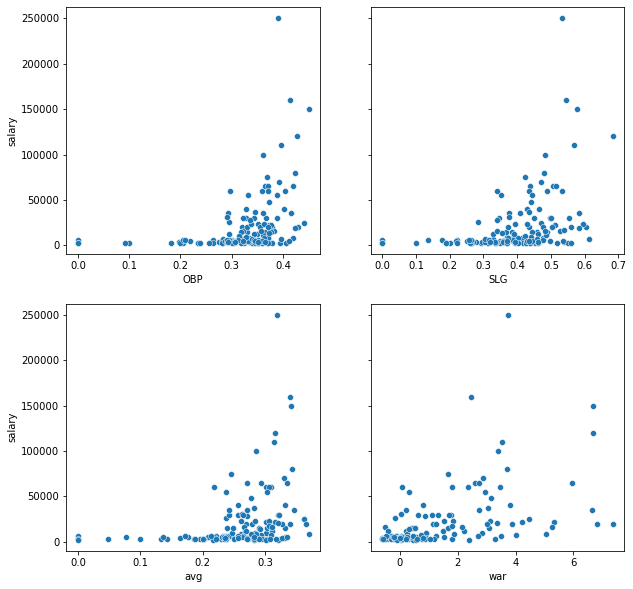

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(10,10), sharey=True)
sns.scatterplot(ax=axes[0, 0], x="OBP", y="salary", data = df1)
sns.scatterplot(ax=axes[0, 1], x="SLG", y="salary", data = df1)
sns.scatterplot(ax=axes[1, 0], x="avg", y="salary", data = df1)
sns.scatterplot(ax=axes[1, 1], x="war", y="salary", data = df1)


<AxesSubplot:xlabel='age', ylabel='salary'>

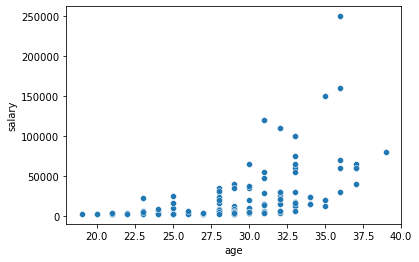

In [10]:
sns.scatterplot(x="age", y="salary", data = df1)

In [11]:
df1[['OBP','SLG','war','salary']].corr()

,OBP,SLG,war,salary
OBP,1.000000,0.843219,0.582608,0.349742
SLG,0.843219,1.000000,0.661914,0.392628
war,0.582608,0.661914,1.000000,0.506093
salary,0.349742,0.392628,0.506093,1.000000


In [12]:
lr_11 = smf.ols(formula = 'salary ~ OBP', data=df1).fit()
lr_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     19.79
Date:                Mon, 20 Sep 2021   Prob (F-statistic):           1.73e-05
Time:                        03:05:20   Log-Likelihood:                -1695.5
No. Observations:                 144   AIC:                             3395.
Df Residuals:                     142   BIC:                             3401.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.346e+04   1.03e+04     -2.269      0.025   -4.39e+04   -3021.868
OBP         1.381e+05    3.1e+04      4.449      0.000    7.67e+04    1.99e+05
==============================================================================
Omnibus:                      139.379   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2145.525
Skew:                           3.517   Prob(JB):                         0.00
Kurtosis:                      20.553   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
lr_12 = smf.ols(formula = 'salary ~ SLG', data=df1).fit()
lr_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     25.88
Date:                Mon, 20 Sep 2021   Prob (F-statistic):           1.13e-06
Time:                        03:05:20   Log-Likelihood:                -1692.8
No. Observations:                 144   AIC:                             3390.
Df Residuals:                     142   BIC:                             3396.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.982e+04   8433.035     -2.350      0.020   -3.65e+04   -3145.902
SLG         1.039e+05   2.04e+04      5.087      0.000    6.36e+04    1.44e+05
==============================================================================
Omnibus:                      135.293   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2007.558
Skew:                           3.375   Prob(JB):                         0.00
Kurtosis:                      20.001   Cond. No.                         9.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
lr_13 = smf.ols(formula = 'salary ~ war', data=df1).fit()
lr_13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     49.58
Date:                Mon, 20 Sep 2021   Prob (F-statistic):           7.20e-11
Time:                        03:05:20   Log-Likelihood:                -1706.2
No. Observations:                 146   AIC:                             3416.
Df Residuals:                     144   BIC:                             3422.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8740.5573   2944.802      2.968      0.004    2919.935    1.46e+04
war         9342.7175   1326.813      7.041      0.000    6720.173     1.2e+04
==============================================================================
Omnibus:                      139.091   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2525.335
Skew:                           3.356   Prob(JB):                         0.00
Kurtosis:                      22.237   Cond. No.                         2.94
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 누적 성적이 2018년 연봉에 얼마나 영향을 미치는지 확인해보자

In [15]:
kbo.head()

,batter_name,age,G,PA,AB,R,H,2B,3B,HR,...,tp,1B,FBP,avg,OBP,SLG,OPS,p_year,YAB,YOPS
0,백용환,24.0,26.0,58.0,52.0,4.0,9.0,4.0,0.0,0.0,...,포수,5.0,6.0,0.173,0.259,0.250,0.509,2014,79.0,0.580
1,백용환,25.0,47.0,86.0,79.0,8.0,14.0,2.0,0.0,4.0,...,포수,8.0,5.0,0.177,0.226,0.354,0.580,2015,154.0,0.784
2,백용환,26.0,65.0,177.0,154.0,22.0,36.0,6.0,0.0,10.0,...,포수,20.0,20.0,0.234,0.316,0.468,0.784,2016,174.0,0.581
3,백용환,27.0,80.0,199.0,174.0,12.0,34.0,7.0,0.0,4.0,...,포수,23.0,20.0,0.195,0.276,0.305,0.581,2017,17.0,0.476
4,백용환,28.0,15.0,20.0,17.0,2.0,3.0,0.0,0.0,0.0,...,포수,3.0,3.0,0.176,0.300,0.176,0.476,2018,47.0,0.691


In [16]:
kbo.columns

Index(['batter_name', 'age', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 'TB',
       'RBI', 'SB', 'CS', 'BB', 'HBP', 'GB', 'SO', 'GDP', 'BU', 'fly', 'year',
       'salary', 'war', 'year_born', 'hand2', 'cp', 'tp', '1B', 'FBP', 'avg',
       'OBP', 'SLG', 'OPS', 'p_year', 'YAB', 'YOPS'],
      dtype='object')

In [17]:
player = kbo.groupby('batter_name').agg({'G': 'sum', 'PA': 'sum','AB': 'sum','R': 'sum','H': 'sum','2B': 'sum',
                                         '3B': 'sum', 'HR': 'sum','TB': 'sum','RBI': 'sum','SB': 'sum','CS': 'sum',
                                         'BB': 'sum', 'HBP': 'sum', 'war': 'sum',                                         
                                         'year': 'max'})
player

,G,PA,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,war,year
batter_name,,,,,,,,,,,,,,,,
강경학,343.0,977.0,827.0,136.0,201.0,25.0,11.0,9.0,275.0,72.0,11.0,7.0,107.0,14.0,0.429,2018
강동관,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.046,2016
강동우,1278.0,4791.0,4147.0,609.0,1112.0,175.0,23.0,65.0,1528.0,423.0,111.0,51.0,507.0,22.0,19.728,2012
강민국,13.0,9.0,9.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.240,2018
강민호,1624.0,6070.0,5280.0,686.0,1460.0,261.0,10.0,240.0,2461.0,849.0,23.0,32.0,569.0,128.0,48.944,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
황선일,12.0,17.0,16.0,0.0,3.0,1.0,0.0,0.0,4.0,2.0,0.0,0.0,0.0,1.0,-0.010,2011
황윤호,161.0,97.0,89.0,28.0,12.0,1.0,1.0,0.0,15.0,6.0,3.0,2.0,2.0,4.0,-0.771,2018
황재균,1199.0,4720.0,4193.0,584.0,1181.0,238.0,25.0,113.0,1808.0,569.0,162.0,83.0,385.0,45.0,26.490,2018


In [18]:
p_18 = player[player['year']==2018]
p_18

,G,PA,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,war,year
batter_name,,,,,,,,,,,,,,,,
강경학,343.0,977.0,827.0,136.0,201.0,25.0,11.0,9.0,275.0,72.0,11.0,7.0,107.0,14.0,0.429,2018
강민국,13.0,9.0,9.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.240,2018
강민호,1624.0,6070.0,5280.0,686.0,1460.0,261.0,10.0,240.0,2461.0,849.0,23.0,32.0,569.0,128.0,48.944,2018
강백호,138.0,585.0,527.0,108.0,153.0,32.0,2.0,29.0,276.0,84.0,3.0,5.0,52.0,3.0,1.437,2018
강진성,73.0,107.0,95.0,10.0,24.0,6.0,0.0,1.0,33.0,6.0,0.0,0.0,8.0,1.0,-0.110,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
홍재호,190.0,293.0,255.0,42.0,51.0,13.0,0.0,3.0,73.0,23.0,2.0,0.0,27.0,1.0,-0.497,2018
홍창기,12.0,25.0,18.0,1.0,3.0,2.0,0.0,0.0,5.0,0.0,0.0,1.0,7.0,0.0,0.045,2018
황윤호,161.0,97.0,89.0,28.0,12.0,1.0,1.0,0.0,15.0,6.0,3.0,2.0,2.0,4.0,-0.771,2018


In [19]:
p_18['avg'] = p_18['H']/p_18['AB']
p_18['OBP'] = (p_18['H'] + p_18['BB'] + p_18['HBP'])/(p_18['PA'])
p_18['SLG'] = ((p_18['H']-p_18['2B']-p_18['3B']-p_18['HR'])+p_18['2B']*2 + p_18['3B']*3 + p_18['HR']*4)/p_18['AB']
p_18['OPS'] = p_18['OBP'] + p_18['SLG']

<ipython-input-19-568cc1cb67c3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_18['avg'] = p_18['H']/p_18['AB']
<ipython-input-19-568cc1cb67c3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_18['OBP'] = (p_18['H'] + p_18['BB'] + p_18['HBP'])/(p_18['PA'])
<ipython-input-19-568cc1cb67c3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

In [20]:
sal = kbo[kbo['year']==2018][['batter_name','salary']]
sal

,batter_name,salary
5,백용환,5300
6,신범수,2900
10,김민식,15000
13,한승택,7500
17,황윤호,3100
...,...,...
1795,홍재호,3500
1816,김종민,5300
1853,김현수,140000
1908,이원석,30000


In [21]:
df2 = p_18.merge(sal, on='batter_name')
df2

,batter_name,G,PA,AB,R,H,2B,3B,HR,TB,...,CS,BB,HBP,war,year,avg,OBP,SLG,OPS,salary
0,강경학,343.0,977.0,827.0,136.0,201.0,25.0,11.0,9.0,275.0,...,7.0,107.0,14.0,0.429,2018,0.243047,0.329580,0.332527,0.662108,5800
1,강민국,13.0,9.0,9.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,-0.240,2018,0.111111,0.111111,0.111111,0.222222,2700
2,강민호,1624.0,6070.0,5280.0,686.0,1460.0,261.0,10.0,240.0,2461.0,...,32.0,569.0,128.0,48.944,2018,0.276515,0.355354,0.466098,0.821453,100000
3,강백호,138.0,585.0,527.0,108.0,153.0,32.0,2.0,29.0,276.0,...,5.0,52.0,3.0,1.437,2018,0.290323,0.355556,0.523719,0.879275,2700
4,강진성,73.0,107.0,95.0,10.0,24.0,6.0,0.0,1.0,33.0,...,0.0,8.0,1.0,-0.110,2018,0.252632,0.308411,0.347368,0.655780,3000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,홍재호,190.0,293.0,255.0,42.0,51.0,13.0,0.0,3.0,73.0,...,0.0,27.0,1.0,-0.497,2018,0.200000,0.269625,0.286275,0.555899,3500
191,홍창기,12.0,25.0,18.0,1.0,3.0,2.0,0.0,0.0,5.0,...,1.0,7.0,0.0,0.045,2018,0.166667,0.400000,0.277778,0.677778,2700
192,황윤호,161.0,97.0,89.0,28.0,12.0,1.0,1.0,0.0,15.0,...,2.0,2.0,4.0,-0.771,2018,0.134831,0.185567,0.168539,0.354106,3100
193,황재균,1199.0,4720.0,4193.0,584.0,1181.0,238.0,25.0,113.0,1808.0,...,83.0,385.0,45.0,26.490,2018,0.281660,0.341314,0.431195,0.772508,120000


<AxesSubplot:xlabel='OPS', ylabel='salary'>

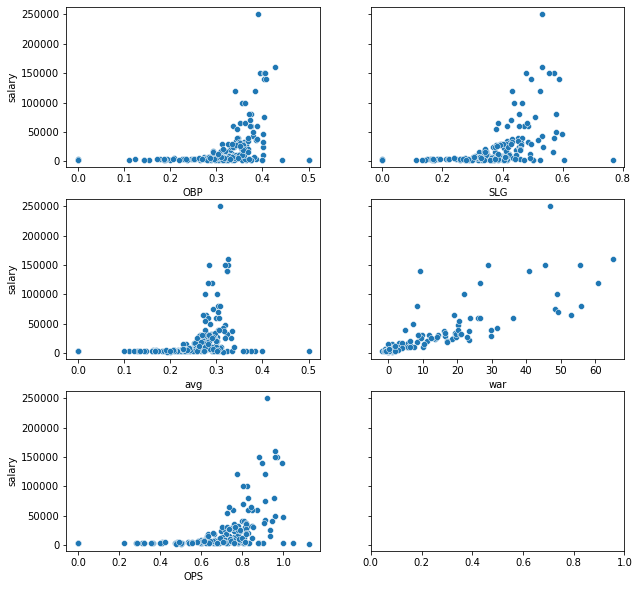

In [22]:
fig, axes = plt.subplots(3, 2, figsize=(10,10), sharey=True)
sns.scatterplot(ax=axes[0, 0], x="OBP", y="salary", data = df2)
sns.scatterplot(ax=axes[0, 1], x="SLG", y="salary", data = df2)
sns.scatterplot(ax=axes[1, 0], x="avg", y="salary", data = df2)
sns.scatterplot(ax=axes[1, 1], x="war", y="salary", data = df2)
sns.scatterplot(ax=axes[2, 0], x="OPS", y="salary", data = df2)

In [23]:
df2[['OBP','SLG','war','salary']].corr()

,OBP,SLG,war,salary
OBP,1.000000,0.830388,0.416992,0.375894
SLG,0.830388,1.000000,0.473302,0.460209
war,0.416992,0.473302,1.000000,0.828402
salary,0.375894,0.460209,0.828402,1.000000


In [24]:
lr_21 = smf.ols(formula = 'salary ~ OBP', data=df2).fit()
lr_21.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     31.76
Date:                Mon, 20 Sep 2021   Prob (F-statistic):           6.12e-08
Time:                        03:05:21   Log-Likelihood:                -2304.5
No. Observations:                 195   AIC:                             4613.
Df Residuals:                     193   BIC:                             4619.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.362e+04      1e+04     -3.345      0.001   -5.34e+04   -1.38e+04
OBP         1.742e+05   3.09e+04      5.635      0.000    1.13e+05    2.35e+05
==============================================================================
Omnibus:                      148.844   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1410.214
Skew:                           2.947   Prob(JB):                    5.97e-307
Kurtosis:                      14.782   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
lr_22 = smf.ols(formula = 'salary ~ SLG', data=df2).fit()
lr_22.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     51.86
Date:                Mon, 20 Sep 2021   Prob (F-statistic):           1.30e-11
Time:                        03:05:21   Log-Likelihood:                -2296.1
No. Observations:                 195   AIC:                             4596.
Df Residuals:                     193   BIC:                             4603.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.111e+04   7638.186     -4.073      0.000   -4.62e+04    -1.6e+04
SLG         1.407e+05   1.95e+04      7.201      0.000    1.02e+05    1.79e+05
==============================================================================
Omnibus:                      142.507   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1333.173
Skew:                           2.773   Prob(JB):                    3.20e-290
Kurtosis:                      14.546   Cond. No.                         9.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
lr_23 = smf.ols(formula = 'salary ~ war', data=df2).fit()
lr_23.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     422.1
Date:                Mon, 20 Sep 2021   Prob (F-statistic):           1.82e-50
Time:                        03:05:21   Log-Likelihood:                -2206.3
No. Observations:                 195   AIC:                             4417.
Df Residuals:                     193   BIC:                             4423.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4730.8130   1642.993      2.879      0.004    1490.286    7971.340
war         2152.4764    104.764     20.546      0.000    1945.848    2359.105
==============================================================================
Omnibus:                      181.734   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3980.652
Skew:                           3.486   Prob(JB):                         0.00
Kurtosis:                      24.008   Cond. No.                         18.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

누적 war가 높을수록 연봉이 올라가는 모습을 보인다.   
avg, OBP, SLG 수치가 높을 때 고액 연봉을 받는 경우가 있지만, 수치가 높은데도 불구하고 연봉이 낮은 경우도 있다.  

## 300경기 이상 출전 선수만 확인

In [27]:
df3 = df2[df2['G']>300]
df3

,batter_name,G,PA,AB,R,H,2B,3B,HR,TB,...,CS,BB,HBP,war,year,avg,OBP,SLG,OPS,salary
0,강경학,343.0,977.0,827.0,136.0,201.0,25.0,11.0,9.0,275.0,...,7.0,107.0,14.0,0.429,2018,0.243047,0.329580,0.332527,0.662108,5800
2,강민호,1624.0,6070.0,5280.0,686.0,1460.0,261.0,10.0,240.0,2461.0,...,32.0,569.0,128.0,48.944,2018,0.276515,0.355354,0.466098,0.821453,100000
6,고종욱,485.0,1827.0,1702.0,292.0,527.0,93.0,21.0,32.0,758.0,...,36.0,92.0,15.0,4.005,2018,0.309636,0.347017,0.445358,0.792375,11000
7,구자욱,484.0,2136.0,1880.0,410.0,624.0,117.0,33.0,66.0,1005.0,...,16.0,206.0,26.0,18.630,2018,0.331915,0.400749,0.534574,0.935324,25000
9,권희동,380.0,1389.0,1205.0,161.0,314.0,58.0,4.0,43.0,509.0,...,8.0,127.0,24.0,4.800,2018,0.260581,0.334773,0.422407,0.757180,13000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,최형우,1426.0,6088.0,5209.0,895.0,1662.0,351.0,12.0,285.0,2892.0,...,17.0,718.0,83.0,55.714,2018,0.319063,0.404566,0.555193,0.959759,150000
182,하주석,441.0,1580.0,1458.0,207.0,384.0,60.0,12.0,31.0,561.0,...,27.0,79.0,18.0,1.949,2018,0.263374,0.304430,0.384774,0.689204,12000
183,한동민,351.0,1330.0,1146.0,201.0,323.0,67.0,4.0,84.0,650.0,...,7.0,119.0,48.0,10.363,2018,0.281850,0.368421,0.567190,0.935611,15000
186,허경민,796.0,2743.0,2407.0,391.0,702.0,121.0,14.0,22.0,917.0,...,33.0,196.0,67.0,12.268,2018,0.291649,0.351805,0.380972,0.732777,26500


<AxesSubplot:xlabel='OPS', ylabel='salary'>

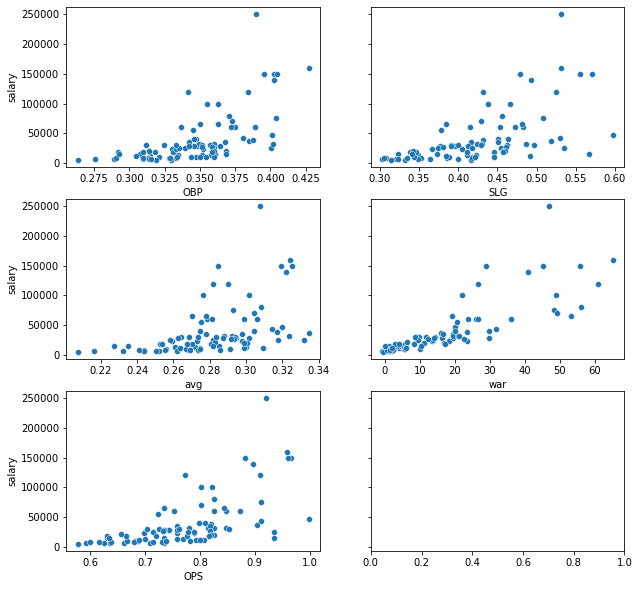

In [28]:
fig, axes = plt.subplots(3, 2, figsize=(10,10), sharey=True)
sns.scatterplot(ax=axes[0, 0], x="OBP", y="salary", data = df3)
sns.scatterplot(ax=axes[0, 1], x="SLG", y="salary", data = df3)
sns.scatterplot(ax=axes[1, 0], x="avg", y="salary", data = df3)
sns.scatterplot(ax=axes[1, 1], x="war", y="salary", data = df3)
sns.scatterplot(ax=axes[2, 0], x="OPS", y="salary", data = df3)

모두 증가할수록 연봉도 증가하는 경향을 보인다.   

In [29]:
df3[['OBP','SLG','war','salary']].corr()

,OBP,SLG,war,salary
OBP,1.000000,0.771847,0.732140,0.623329
SLG,0.771847,1.000000,0.642057,0.573050
war,0.732140,0.642057,1.000000,0.808632
salary,0.623329,0.573050,0.808632,1.000000


In [30]:
lr_31 = smf.ols(formula = 'salary ~ war', data=df3).fit()
lr_31.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     162.5
Date:                Mon, 20 Sep 2021   Prob (F-statistic):           1.62e-21
Time:                        03:05:22   Log-Likelihood:                -1018.2
No. Observations:                  88   AIC:                             2040.
Df Residuals:                      86   BIC:                             2045.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3186.5142   3950.441      0.807      0.422   -4666.703     1.1e+04
war         2164.9870    169.850     12.747      0.000    1827.337    2502.637
==============================================================================
Omnibus:                       72.620   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              571.536
Skew:                           2.505   Prob(JB):                    7.81e-125
Kurtosis:                      14.436   Cond. No.                         33.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
lr_32 = smf.ols(formula = 'salary ~ OBP', data=df3).fit()
lr_32.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     54.65
Date:                Mon, 20 Sep 2021   Prob (F-statistic):           8.81e-11
Time:                        03:05:22   Log-Likelihood:                -1043.2
No. Observations:                  88   AIC:                             2090.
Df Residuals:                      86   BIC:                             2095.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.532e+05   3.97e+04     -6.375      0.000   -3.32e+05   -1.74e+05
OBP         8.425e+05   1.14e+05      7.392      0.000    6.16e+05    1.07e+06
==============================================================================
Omnibus:                       51.939   Durbin-Watson:                   2.315
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.233
Skew:                           1.891   Prob(JB):                     6.06e-46
Kurtosis:                       9.519   Cond. No.                         34.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
lr_33 = smf.ols(formula = 'salary ~ SLG', data=df3).fit()
lr_33.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     42.05
Date:                Mon, 20 Sep 2021   Prob (F-statistic):           5.39e-09
Time:                        03:05:22   Log-Likelihood:                -1047.3
No. Observations:                  88   AIC:                             2099.
Df Residuals:                      86   BIC:                             2104.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.184e+05   2.46e+04     -4.813      0.000   -1.67e+05   -6.95e+04
SLG         3.724e+05   5.74e+04      6.485      0.000    2.58e+05    4.87e+05
==============================================================================
Omnibus:                       42.681   Durbin-Watson:                   2.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.788
Skew:                           1.607   Prob(JB):                     1.46e-29
Kurtosis:                       8.088   Cond. No.                         17.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 포지션 별 타율/출루율 비교

In [34]:
kbo.groupby('tp')['avg'].mean().sort_values(ascending=False)

tp
1루수     0.265198
우익수     0.259678
지명타자    0.257167
중견수     0.250804
좌익수     0.248481
3루수     0.247129
포수      0.238648
2루수     0.237517
유격수     0.236485
Name: avg, dtype: float64

In [35]:
avg_tp = kbo.groupby('tp').agg({'H': 'sum', 'AB': 'sum', 'BB': 'sum', 'HBP': 'sum', 'PA': 'sum'})
avg_tp

,H,AB,BB,HBP,PA
tp,,,,,
1루수,15665.0,53110.0,6914.0,796.0,61518.0
2루수,12985.0,47522.0,4828.0,812.0,54712.0
3루수,14407.0,51418.0,5380.0,1076.0,59140.0
우익수,15699.0,53683.0,5458.0,932.0,61163.0
유격수,13677.0,52359.0,4782.0,771.0,59937.0
좌익수,16880.0,58723.0,6329.0,817.0,67291.0
중견수,15564.0,54714.0,5542.0,767.0,62346.0
지명타자,4753.0,16959.0,2022.0,332.0,19552.0
포수,12820.0,48566.0,4304.0,835.0,55092.0


In [36]:
avg_tp['avg']=avg_tp['H']/avg_tp['AB']
avg_tp['avg'].sort_values(ascending=False)

tp
1루수     0.294954
우익수     0.292439
좌익수     0.287451
중견수     0.284461
지명타자    0.280264
3루수     0.280194
2루수     0.273242
포수      0.263971
유격수     0.261216
Name: avg, dtype: float64

In [37]:
avg_tp['OBP'] = (avg_tp['H'] + avg_tp['BB'] + avg_tp['HBP'])/(avg_tp['PA'])
avg_tp['OBP'].sort_values(ascending=False)

tp
1루수     0.379970
지명타자    0.363492
우익수     0.361150
좌익수     0.357046
3루수     0.352773
중견수     0.350832
2루수     0.340419
포수      0.325982
유격수     0.320837
Name: OBP, dtype: float64